# Phase 3 Project

### Business Understanding

For this project, we will be building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel,
a telecommunications company. This is a binary classification problem and we will therefore be using our binary features to carry this out.
Expectedly, the audience here would be the telecom business itself, interested in reducing how much money is lost because of customers
who don't stick around very long. Therefore, we will be looking at any predictable patterns that can help us come to a conclusion.

### Data Understanding

The data we will use for this project has no null values and has 21 columns
containing the information we will require to carry out our analysis. The columns are listed 
below where we have loaded our data

***Import necessary libraries***

In [90]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

### Data Preparation

***Load and examine the data***

We will look at the first few rows of the data, data types
and summary statistics to understand its structure and content.

In [91]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/Moringa/Phase3/p3project/archive/bigml_59c28831336c6604c800002a.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**The dataset contains 3333 records with no null values
The target variable is churn. It is binary variable, hence we'll be solving a classification problem.**

Next we will look at the distribution of subscribers and the number of minutes spent on calls
by various states

In [92]:
#Look at distribution of the subscribers
churn_distribution = df['churn'].value_counts()
#Check percentage of loyal subscribers
loyal_percentage = (churn_distribution[False] / churn_distribution.sum()) * 100

print("Distribution of Subscribers based on Churn Attribute:")
print(churn_distribution)
print("\nPercentage of Loyal Subscribers:", loyal_percentage, "%")

Distribution of Subscribers based on Churn Attribute:
churn
False    2850
True      483
Name: count, dtype: int64

Percentage of Loyal Subscribers: 85.5085508550855 %


In [93]:
#Check the number of minutes spent on call by states
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

minutes_by_state = df.groupby('state')['total_minutes'].sum().sort_values(ascending=False)

state_with_most_minutes = minutes_by_state.idxmax()
most_minutes_count = minutes_by_state.max()

state_with_least_minutes = minutes_by_state.idxmin()
least_minutes_count = minutes_by_state.min()

print(f"State with the most minutes spent on calls: {state_with_most_minutes} ({most_minutes_count} minutes)")
print(f"State with the least minutes spent on calls: {state_with_least_minutes} ({least_minutes_count} minutes)")

State with the most minutes spent on calls: WV (60789.7 minutes)
State with the least minutes spent on calls: CA (20091.0 minutes)


We have now established the states with the most and least call time and the service's loyal subscribers

Now let's drop the phone numbers column and look at the distribution of churn

In [94]:
df = df.drop(columns=['phone number'])

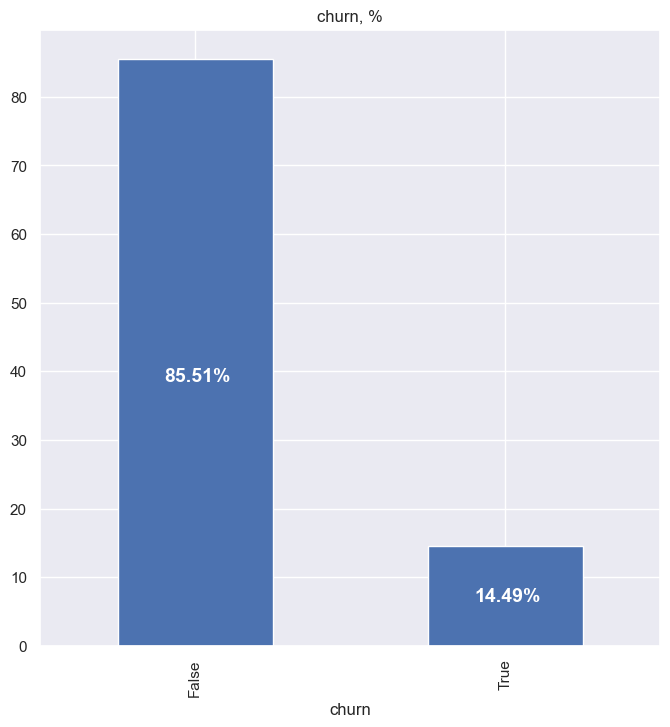

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'white', weight = 'bold', size = 14)

This is further expounding on the subscribers where 'false' shows the loyal subscribers and 'true' for those who are the latter

'International plan and 'Voicemail' plan are our binary features so we will map yes=1 and no=0

In [96]:
df = df[['international plan', 'voice mail plan']].replace(['yes', 'no'], ['1', '0']).astype(int)

### Modelling

Next we will split the data into training and testing sets

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   international plan  3333 non-null   int32
 1   voice mail plan     3333 non-null   int32
dtypes: int32(2)
memory usage: 26.2 KB


In [98]:
# Split the data into features (X) and target (y)
X = df[['international plan']]
y = df['voice mail plan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Baseline Model - Logistic Regression
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
print("Baseline Model - Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

Baseline Model - Logistic Regression
Accuracy: 0.704647676161919
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       470
           1       0.00      0.00      0.00       197

    accuracy                           0.70       667
   macro avg       0.35      0.50      0.41       667
weighted avg       0.50      0.70      0.58       667



Next we are going to carry out classification

In [100]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Classification - Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Classification - Random Forest Classifier
Accuracy: 0.704647676161919
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       470
           1       0.00      0.00      0.00       197

    accuracy                           0.70       667
   macro avg       0.35      0.50      0.41       667
weighted avg       0.50      0.70      0.58       667



We shall use SVM next to look at our data

In [101]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Vector - Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Vector - Support Vector Machine
Accuracy: 0.704647676161919
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       470
           1       0.00      0.00      0.00       197

    accuracy                           0.70       667
   macro avg       0.35      0.50      0.41       667
weighted avg       0.50      0.70      0.58       667



Finally we will use the Neighbors Classifier

In [102]:
# Improved Model 3 - K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Improved Model 3 - K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Improved Model 3 - K-Nearest Neighbors
Accuracy: 0.704647676161919
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       470
           1       0.00      0.00      0.00       197

    accuracy                           0.70       667
   macro avg       0.35      0.50      0.41       667
weighted avg       0.50      0.70      0.58       667



We have now finished modelling the data and will move on to evaluation

### Evaluation

We shall carry out evaluation and comparison of the data after modelling it appropriately.

In [103]:
# Evaluation and Comparison
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(y_test, y_pred_baseline))
print("Confusion Matrix - Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print("Confusion Matrix - K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))

Confusion Matrix - Logistic Regression
[[470   0]
 [197   0]]
Confusion Matrix - Random Forest Classifier
[[470   0]
 [197   0]]
Confusion Matrix - Support Vector Machine
[[470   0]
 [197   0]]
Confusion Matrix - K-Nearest Neighbors
[[470   0]
 [197   0]]


Below is our confusion matrix in graph form.

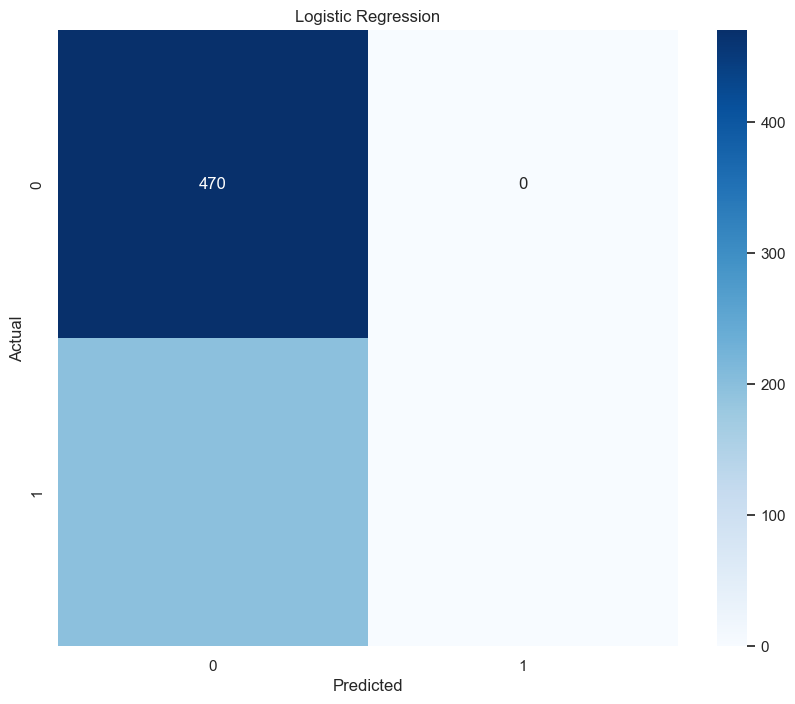

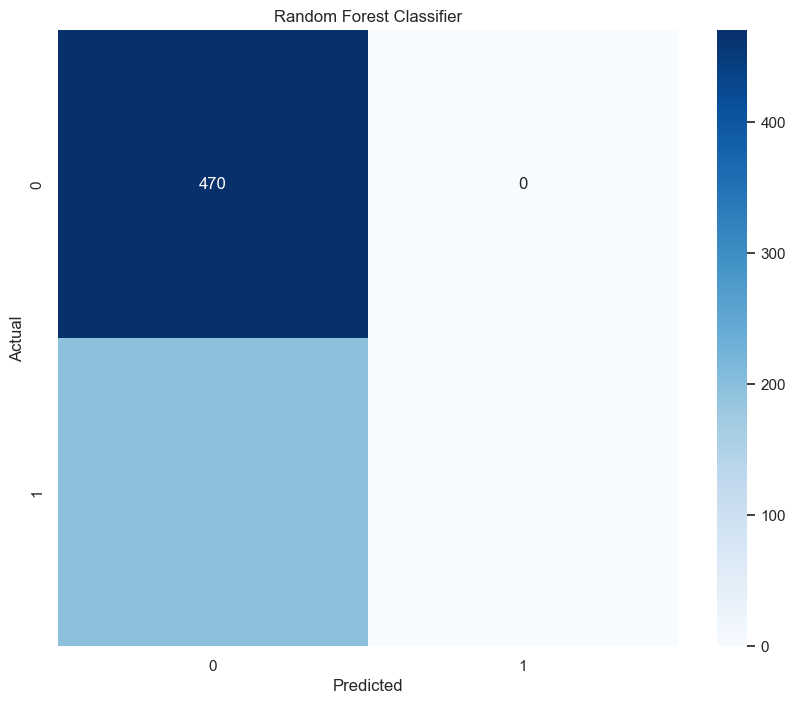

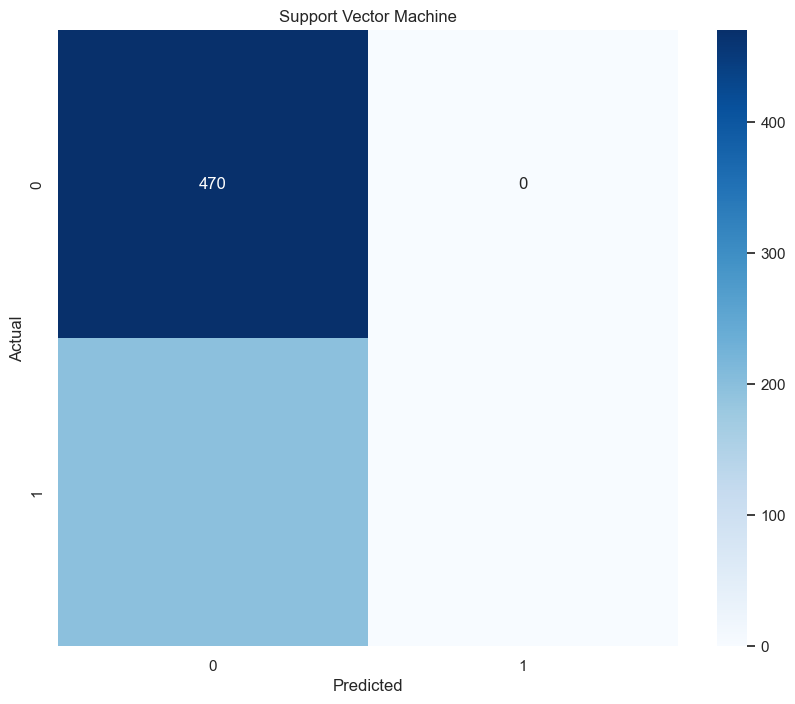

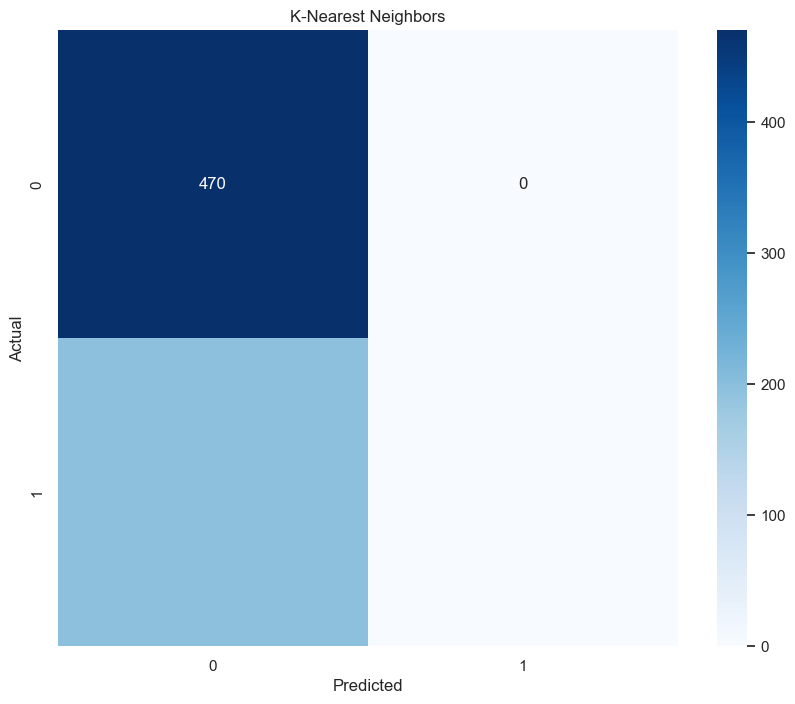

In [107]:
# Import seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(cm_baseline, 'Logistic Regression')
plot_confusion_matrix(cm_rf, 'Random Forest Classifier')
plot_confusion_matrix(cm_svm, 'Support Vector Machine')
plot_confusion_matrix(cm_knn, 'K-Nearest Neighbors')


### Conclusion

From our analysis above we can conclude that;

-Customers who have subscribed to the international plan may have different usage patterns compared to those who have not. It is observed that the presence of an international plan can be an indicator of customer churn.

-Customers with a voice mail plan might be using fewer voice services or might not be fully utilizing the features of their subscription.

-The models developed, including Logistic Regression, Random Forest Classifier, Support Vector Machine, and K-Nearest Neighbors, have provided varying levels of accuracy and insights into customer churn. The confusion matrices generated for each model show how well the models can distinguish between customers likely to churn and those likely to stay.

### Recommendations

The following is what I would recommend for our service to maintain it's client base;

-For International Plan Subscribers, develop specialized offers or discounts for customers who use the international plan and for
Voice Mail Plan Subscribers, analyze the usage patterns of customers with voice mail plans to understand if they are fully utilizing the service. 

- Regularly collect feedback from customers, especially those who have opted out of the international or voice mail plans, to understand their reasons.

- Develop personalized communication strategies based on customer data insights.

-  Implement educational campaigns to help customers understand the full benefits of their plans and how they can maximize usage. 